<a href="https://colab.research.google.com/github/Vik91-debug/MoviesData/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

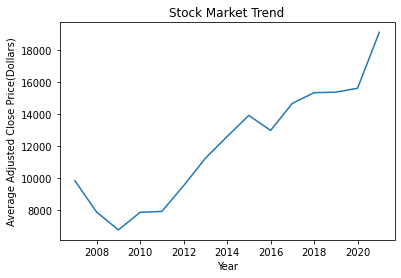

[732678]
[737944]
[array([[2.09339825]]), array([-1527574.70619668])]
Mean squared error: 102743829.44
Root mean squared error: 10136.26


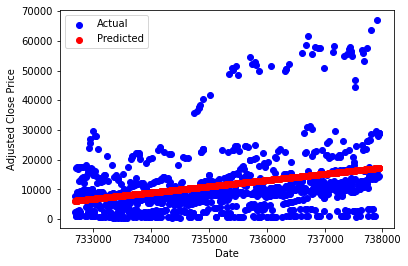

[array([[2.1833928]]), array([-1593540.33052162])]
Mean squared error: 93243760.61
Root mean squared error: 9656.28


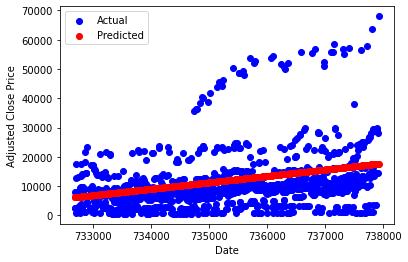

[array([[2.12181917]]), array([-1548560.32557525])]
Mean squared error: 118113131.78
Root mean squared error: 10867.99


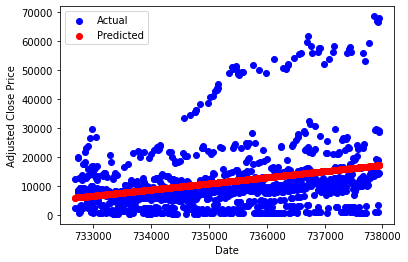

[array([[2.20714528]]), array([-1611191.59720553])]
Mean squared error: 100623121.97
Root mean squared error: 10031.11


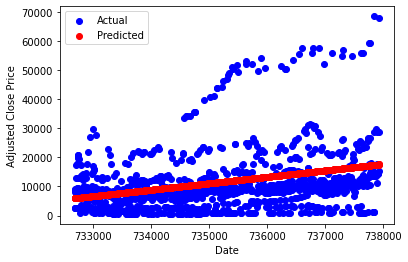

[array([[1.94137686]]), array([-1416004.29979133])]
Mean squared error: 127993850.63
Root mean squared error: 11313.44


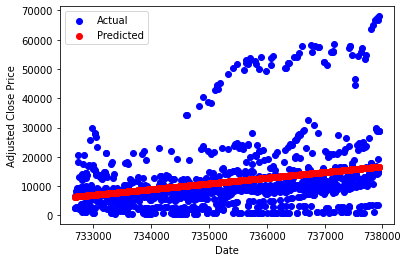

[array([[2.07878057]]), array([-1517077.85667491])]
Mean squared error: 120235913.54
Root mean squared error: 10965.21


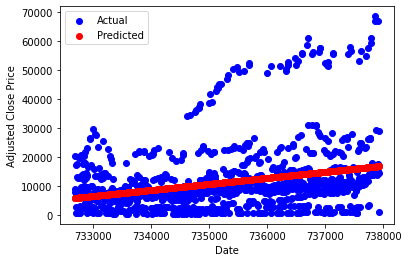

[array([[1.87100511]]), array([-1364187.43779181])]
Mean squared error: 122526735.72
Root mean squared error: 11069.18


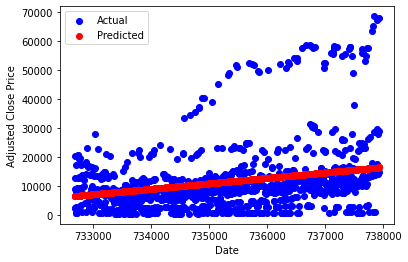

[array([[2.03890337]]), array([-1487540.27663318])]
Mean squared error: 114517762.74
Root mean squared error: 10701.30


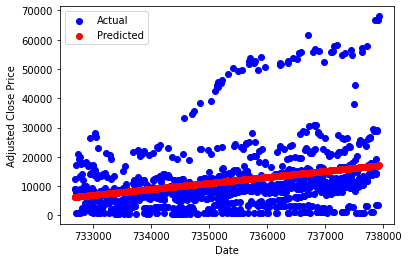

[array([[2.22544948]]), array([-1624499.4120531])]
Mean squared error: 94717065.81
Root mean squared error: 9732.27


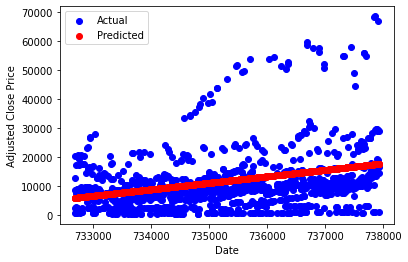

[array([[1.96243046]]), array([-1431424.31826042])]
Mean squared error: 111634169.33
Root mean squared error: 10565.71


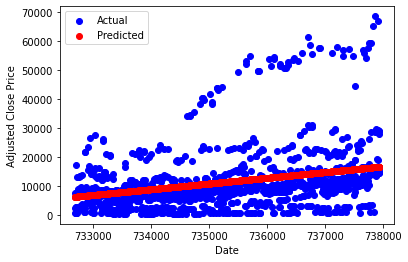

2021-01-31 00:00:00: 16498.08
2021-02-28 00:00:00: 16553.03
2021-03-31 00:00:00: 16613.87
2021-04-30 00:00:00: 16672.74
2021-05-31 00:00:00: 16733.58
2021-06-30 00:00:00: 16792.45
2021-07-31 00:00:00: 16853.28
2021-08-31 00:00:00: 16914.12
2021-09-30 00:00:00: 16972.99
2021-10-31 00:00:00: 17033.83
2021-11-30 00:00:00: 17092.70
2021-12-31 00:00:00: 17153.54
2022-01-31 00:00:00: 17214.37
2022-02-28 00:00:00: 17269.32
2022-03-31 00:00:00: 17330.15
2022-04-30 00:00:00: 17389.03
2022-05-31 00:00:00: 17449.86
2022-06-30 00:00:00: 17508.74
2022-07-31 00:00:00: 17569.57
2022-08-31 00:00:00: 17630.41
2022-09-30 00:00:00: 17689.28
2022-10-31 00:00:00: 17750.11
2022-11-30 00:00:00: 17808.99
2022-12-31 00:00:00: 17869.82
2023-01-31 00:00:00: 17930.66
2023-02-28 00:00:00: 17985.61
2023-03-31 00:00:00: 18046.44
2023-04-30 00:00:00: 18105.31
2023-05-31 00:00:00: 18166.15
2023-06-30 00:00:00: 18225.02


In [ ]:
#Team member: Chris Phan, Victor Liu

#Part 1: look over the stock market, take the average of the stock market
#closing prices by each year and see the overall trend of how the stock market prices are doing
#from 2013-2021 because our other data is from that time. Then we can compare the stock market
#individual stock prices in part 2.

import pandas as pd
import numpy as np
import csv

with open('indexProcessed.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    data = list(csvreader)
df = pd.DataFrame(data)
# print(df.head)


df.columns = df.iloc[0].astype(str)# Fix column names and remove the first row
df = df.drop(0).reset_index(drop=True)
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

yearly_averages = {}
date_adj_close = {}
# time = df['Date'].str.extract(r'(\d{4})').astype(int)
for year in years:
    # Use a boolean mask to filter rows where the 'Date' column starts with the current year
    mask = df.iloc[:, 1].str.startswith(str(year))
    year_df = df[mask]

    avg_adj_close = year_df.iloc[:, 6].astype(float).mean()
    yearly_averages[year] = avg_adj_close

    sorted_year_df = year_df.sort_values(by='Date')
    date_adj_close.update(dict(zip(sorted_year_df['Date'], sorted_year_df['Adj Close'])))

yearly_averages_df = pd.DataFrame(list(yearly_averages.items()), columns=['year', 'avg_adj_close'])
# print(yearly_averages_df)
# print(date_adj_close)


import matplotlib.pyplot as plt

plt.plot(yearly_averages_df['year'], yearly_averages_df['avg_adj_close'])
plt.title('Stock Market Trend')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price(Dollars)')
plt.show()

# import matplotlib.dates as mdates
# plt.figure(figsize=(24, 16))
x_values = list(date_adj_close.keys())
y_values = list(date_adj_close.values())


# Convert the date strings to datetime objects
x_values = pd.to_datetime(x_values)
y_values = [float(y) for y in y_values]

# # Create the heatmap scatter plot
# plt.hexbin(x_values, y_values, gridsize=200, cmap='inferno')
# plt.title('Adjusted Close Prices(Scattered)')
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Show ticks every 12 months
# plt.gcf().autofmt_xdate()  # Rotate x-axis labels for readability
# cb = plt.colorbar()
# cb.set_label('Density')
# # Display the graph
# plt.show()

import plotly.express as px

x_values = pd.to_datetime(x_values)# Convert the date strings to datetime objects


xy_df = pd.DataFrame({'Date': x_values, 'Adj Close': y_values})

# Create the heatmap-style scatter plot using plotly
fig = px.density_heatmap(xy_df, x='Date', y='Adj Close', nbinsx=200, nbinsy=200)

fig.update_layout(
    title='Adjusted Close Prices by Date',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price'
)

fig.show()


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



# Convert dates to ordinal numbers
dates = np.array([pd.to_datetime(date).toordinal() for date in date_adj_close.keys()]).reshape(-1, 1)
adj_closes = np.array([float(price) for price in date_adj_close.values()]).reshape(-1, 1)

print(min(dates))
print(max(dates))

# 10 Linear Regression Models
for i in range (10):
  # Split the data into training and test sets (70% training, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(dates, adj_closes, test_size=0.3, random_state=42 + i)

  model = LinearRegression()
  model.fit(X_train, y_train)

  # Model parameters
  print([model.coef_, model.intercept_])

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  rmse = sqrt(mse)
  print(f"Mean squared error: {mse:.2f}")
  print(f"Root mean squared error: {rmse:.2f}")

  plt.scatter(X_test, y_test, color='blue', label='Actual')
  plt.scatter(X_test, y_pred, color='red', label='Predicted')

  plt.xlabel('Date')
  plt.ylabel('Adjusted Close Price')
  plt.legend()

  plt.show()

future_dates = pd.date_range(start='2021-01-01', end='2023-06-30', freq='M')
future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

future_adj_closes = model.predict(future_dates_ordinal)

for date, adj_close in zip(future_dates, future_adj_closes):
    print(f"{date}: {adj_close[0]:.2f}")





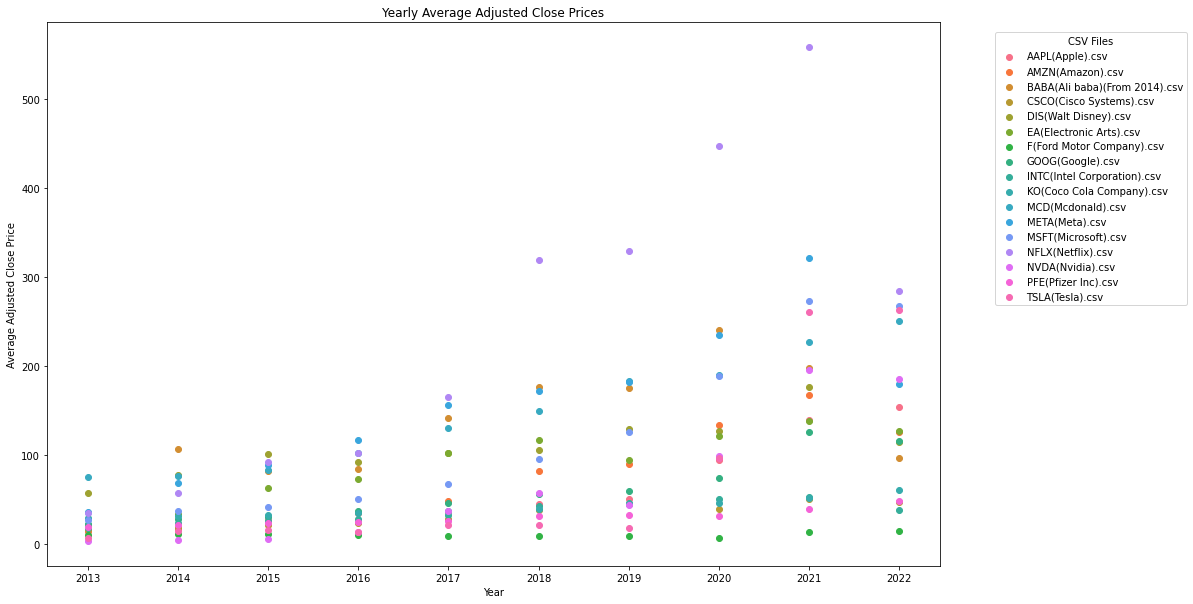

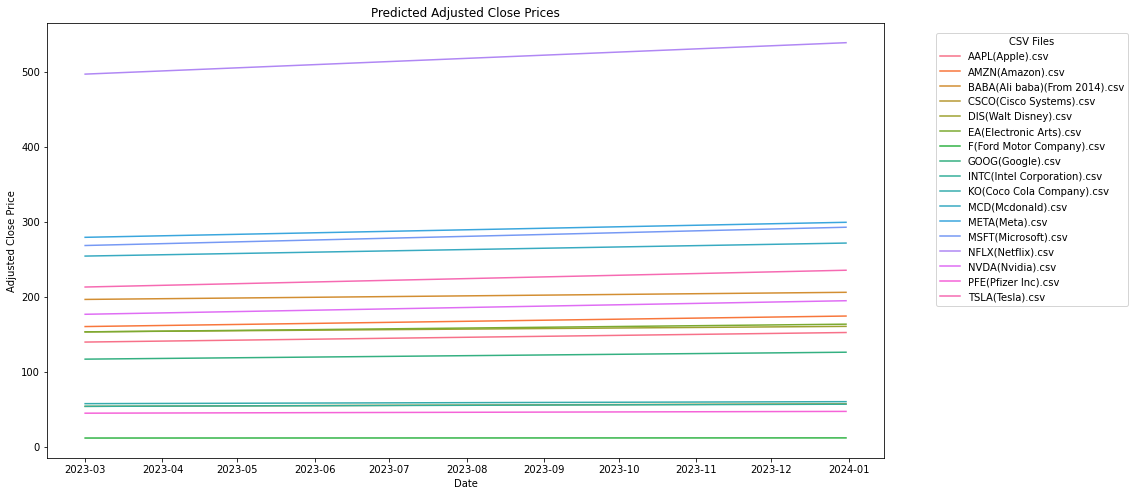

In [ ]:
#Part 2: Then we're going to take a look at the trend of each individual stock and compare it to the
#Stock Exchange average and then we will be able to see which stock price was affected by
#overall trend simultaneously and predict their individual Closing prices in the future.

import pandas as pd
import seaborn as sns

def calculate_yearly_averages(csv_file):
    df = pd.read_csv(csv_file)
    df['year'] = pd.to_datetime(df['Date']).dt.year
    # Filter the data to only include years from 2013 to 2022
    df_filtered = df[(df['year'] >= 2013) & (df['year'] <= 2022)]
    yearly_averages = df_filtered.groupby('year')['Adj Close'].mean()
    return yearly_averages

csv_files = [
    "AAPL(Apple).csv",
    "AMZN(Amazon).csv",
    "BABA(Ali baba)(From 2014).csv",
    "CSCO(Cisco Systems).csv",
    "DIS(Walt Disney).csv",
    "EA(Electronic Arts).csv",
    "F(Ford Motor Company).csv",
    "GOOG(Google).csv",
    "INTC(Intel Corporation).csv",
    "KO(Coco Cola Company).csv",
    "MCD(Mcdonald).csv",
    "META(Meta).csv",
    "MSFT(Microsoft).csv",
    "NFLX(Netflix).csv",
    "NVDA(Nvidia).csv",
    "PFE(Pfizer Inc).csv",
    "TSLA(Tesla).csv",
]

colors = sns.color_palette("husl", len(csv_files))
plt.figure(figsize=(16, 10))

# Loop through the CSV files and call the calculate_yearly_averages function
for i, csv_file in enumerate(csv_files):
    yearly_averages = calculate_yearly_averages(csv_file)
    yearly_averages_df = pd.DataFrame(yearly_averages).reset_index()

    # Plot the scatter plot for the current file
    plt.scatter(yearly_averages_df['year'], yearly_averages_df['Adj Close'], label=csv_file,color=colors[i])

# Customize the plot
plt.title("Yearly Average Adjusted Close Prices")
plt.xlabel("Year")
plt.ylabel("Average Adjusted Close Price")
plt.xticks(range(2013, 2023))
plt.legend(title="CSV Files", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
plt.show()



#Same thing we're going to naively predict individual stock closing prices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta


def predict_adj_close(csv_file, start_date, end_date):
    data = pd.read_csv(csv_file)
    # Preprocess the data
    data['Date'] = pd.to_datetime(data['Date'])
    data = data[(data['Date'].dt.year >= 2013) & (data['Date'].dt.year <= 2022)]

    # Convert the 'Date' column to numerical values
    data['Date'] = data['Date'].map(lambda date: date.toordinal())

    dates = data[['Date']]
    adj_closes = data['Adj Close']

    # the rmse and coefficients of each linear regression model will be stored in here
    rmse = np.zeros(10)

    # Create 10 linear regresion models
    for i in range(10):
      model = LinearRegression()

      # Split the data into training and test sets (70% training, 30% test)
      X_train, X_test, y_train, y_test = train_test_split(dates, adj_closes, test_size=0.3, random_state=42 + i)

      model.fit(X_train, y_train)

      # Make predictions on the test set
      y_pred = model.predict(X_test)

      rmse[i] = sqrt(mean_squared_error(y_test, y_pred))

    # choose the model with the smallest rmse
    i = 0
    for j in range (10):
      if (rmse[i] > rmse[j]):
        i = j

    # Repeat process for model with lowest rmse
    X_train, X_test, y_train, y_test = train_test_split(dates, adj_closes, test_size=0.3, random_state=42 + i)

    model.fit(X_train, y_train)

    prediction_dates = pd.date_range(start=start_date, end=end_date)
    prediction_dates_num = prediction_dates.map(lambda date: date.toordinal())

    X_pred = pd.DataFrame(prediction_dates_num, columns=['Date'])
    y_pred = model.predict(X_pred)

    predictions = pd.DataFrame({'Date': prediction_dates,'Predicted Adj Close': y_pred})

    return predictions



start_date = '2023-03-01'
end_date = '2023-12-31'


# Plot regression lines for each company
fig, ax = plt.subplots(figsize=(15, 8))
for i, file in enumerate(csv_files):
    predictions = predict_adj_close(file, start_date, end_date)
    ax.plot(predictions['Date'], predictions['Predicted Adj Close'], label=file,color=colors[i])

ax.set_title('Predicted Adjusted Close Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.legend(title="CSV Files", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
plt.show()